<a href="https://colab.research.google.com/github/chaukuo/chaukuo/blob/main/INSPER_WorkshopIV_CNN_AULA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insper - Workshop DL : Convolutional Neural Networks (CNNs)

## Preparando o dataset

Detecção de Derame Pleural em Rx de Tórax

    O NIH ChestXray14 contém cerca de 110.000 raio x de tórax anotados em 14 diferentes categorias


In [ ]:
# Baixando os dados
!git clone https://github.com/fornaciali/data.git

Cloning into 'data'...
remote: Enumerating objects: 706, done.
remote: Total 706 (delta 0), reused 0 (delta 0), pack-reused 706
Receiving objects: 100% (706/706), 158.66 MiB | 25.90 MiB/s, done.
Checking out files: 100% (700/700), done.


In [ ]:
!ls

data  sample_data


### Passo 1: Criando o dataset

O conjunto de dados que vamos utilizar consiste de 350 imagens de Rx de tórax normais e 350 Rx com derrame, retiradas e selecionadas do dataset público NIH ChestXray14.


In [ ]:
from glob import glob

derrame_dir = '/content/data/effusion/*/*.png' #Define o caminho das pastas que contém as imagens
normal_dir = '/content/data/normal/*/*.png'

derrame_lista = glob(derrame_dir) #Lista os arquvos dentro de cada uma das pastas, usando o glob()
normal_lista = glob(normal_dir)

print('Número de casos com derrame: ', len(derrame_lista)) #Visualiza o tamanho da lista
print('Número de casos normais: ', len(normal_lista))
print ('\nEtapa Concluída. Vamos para a próxima!')

#O resultado esperado é:
#Número de casos com derrame:  350
#Número de casos normais:  350

Número de casos com derrame:  350
Número de casos normais:  350

Etapa Concluída. Vamos para a próxima!


### Passo 2: Visualizando seus dados

Podemos também ver cada uma das imagens do nosso dataset. 

Vamos visualizar uma imagem com derrame

Na linha "ID_arquivo" escolha um numero entre 0 e 349 e rode a célula, pode repetir quantas vezes quiser.

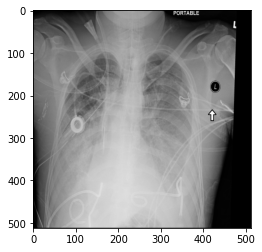

Classe:  Derrame

Etapa Concluída. Vamos para a próxima!


In [ ]:
import cv2 #Para abrir o arquivo de imagem, utilizaremos o openCV, uma biblioteca aberta de visão computacional
from matplotlib import pyplot as plt #Biblioteca de plotagem de gráficos chamada a matplotlib

#Em 'Classe' digite 'N' para imagens da classe 'Normal', 
#ou substitua-o por 'D' para imagens com derrame
Classe = 'D'

#Escolha uma imagem entre 0 e 349:
ID_arquivo = 301

if Classe == 'N':
    classe = 'Normal'
    classe_lista = normal_lista
elif Classe == 'D':
    classe = 'Derrame'
    classe_lista = derrame_lista
    
imagem = cv2.imread(classe_lista[ID_arquivo])
plt.imshow(imagem)
plt.show()
    
print('Classe: ',classe)
print ('\nEtapa Concluída. Vamos para a próxima!')

#Pode modificar o ID_arquivo ou a Classe para vizualizar outras imagens. Pode repetir quantas vezes quiser

### Passo 3:  Criando os Lables e transformando nossas imagens em matrizes (números)

Precisamos informar explicitamente a qual das categorias as imagens pertecem em uma lista chamada labels (derrame = 1, normal = 0)

Faremos isso ao mesmo tempo que salvaremos as imagens numa matriz, pois como as redes neurais tem entrada de tamanho fixo, precisaremos redimensionar todas as imagens para um tamanho único que deve ser exatamente o mesmo da primeira camada da nossa rede neural convolucional (Input Layer), imagine que cada pixel será transformado em um número que vai entrar em cada neuronio da primeira camada, no nosso caso utilizaremos um tamanho de 256 x 256 pixels.

In [ ]:
import numpy as np 

IMAGE_SIZE = (256, 256)

dataset = [] # cria uma lista vazia para incluir as imagens do dataset
labels = [] # cria uma lista vazia para incluir a categoria a qual cada imagem pertence (0 ou 1)

for arquivo in derrame_lista: # para cada arquivo de imagem na lista derrame:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo em escala de cinzas
    img = cv2.resize(img, IMAGE_SIZE) #redimensiona a imagem para 256 x 256
    dataset.append(img) #adiciona essa imagem na lista do dataset que criamos acima
    labels.append(1) #informa que ela é um caso de derrrame (1)

#Agora faremos o mesmo para as imagens sem derrame
for arquivo in normal_lista:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, IMAGE_SIZE) 
    dataset.append(img)
    labels.append(0) #mas agora informaremos que ela é um caso normal (0)
    
dataset = np.asarray(dataset, dtype=np.float32) #transforma a lista de variáveis numa matriz
labels = np.asarray(labels)

for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1)) #faremos a normalização, dividindo a média pelo desvio padrão
  # normalização diminui a variabilizada do dataset, deixando os valores mais próximos um do outro
  
print('Dimensões da Matriz: ',dataset.shape)
print ('\nEtapa Concluída. Vamos para a próxima!')

#Vamos ver qual o tamanho dessa matriz 'dataset'
#Esperamos que a primeira dimensão dela seja de 700 (350 casos de derrame e 350 normais)
#A segunda e a terceira dimensões devem ser 256.

# a saída esperada é (700, 256, 256)

Dimensões da Matriz:  (700, 256, 256)

Etapa Concluída. Vamos para a próxima!


### Passo 4: Dividindo o dataset nos grupos Treinamento/Validação/Teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Vamos dividir o grupo de treino, validação e teste na proporção de cerca de 70%/15%/15%, 
#com valores aproximados para ficarmos com números redondos de 500/100/100

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset[:,...,np.newaxis], labels[:,...,np.newaxis], test_size=0.142, random_state=80)
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.1651, random_state=80)

print('(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)')
print(dataset_train.shape, labels_train.shape)
print(dataset_val.shape, labels_val.shape)
print(dataset_test.shape, labels_test.shape)

#Você deve ver a seguinte saída:
#(500, 256, 256, 1) (500,1)
#(100, 256, 256, 1) (100,1)
#(100, 256, 256, 1) (100,1)

print ('\nEtapa Concluída. Vamos para a próxima!')

(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)
(500, 256, 256, 1) (500, 1)
(100, 256, 256, 1) (100, 1)
(100, 256, 256, 1) (100, 1)

Etapa Concluída. Vamos para a próxima!


## Data Augmentation

Nós temos um dataset pequeno, o que eleva a chance de overfiting do nosso modelo, ou seja, nosso modelo fica muito especializado apenes Rx de tórax que apresentamos, não conseguindo generalizar para os mais variados Rx de tórax do mundo real, com posições diferentes, etc...

Para tentar aumentar artificialmente o número de exemplos, vamos utilizar uma técnica chamada Data Augmentation, que levemente roda e muda a posição da imagem aleatóriamente antes de apresentar para a rede neural. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Aqui podemos definir diferentes variáveis que vão definir como as imagens  
#vão mudar em rotação, "corte" ou zoom.

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

print ('\nEtapa Concluída. Vamos para a próxima!')


Etapa Concluída. Vamos para a próxima!


## Criando a estrutura da CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Concatenate, add
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, LeakyReLU
from keras.utils.np_utils import to_categorical

#Agora criaremos a estrutura da rede neural convolucional

#A primeira camada define o tamanho da camada de entrada da rede
imgs = Input(shape=(256,256,1))

#Lembre que a nossa matriz com todas as 556 imagens de cada categoria tem o formato (556, 256, 256)
#Nesse caso a entrada (input) da rede é cada imagem individualmente
#Ou seja, uma imagem de tamanho 256 x 256 pixels e 1 canal de cor (escala de cinzas) (256, 256, 1)

#Agora vamos adicionar a primeira camada convolucional
x = Conv2D(8, 3, padding='same', activation='relu')(imgs)

#Em seguida, adicionamos uma camada MaxPool, que irá reduzir em 75% o tamanho da saída da camada convolucional.
#Fazemos isso para evitar que o número de parâmetros da rede aumente demais.
x = MaxPool2D()(x)

#Adicionaremos mais camadas convolucionais, seguidas de MaxPool
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(20, 5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(20, 5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(50, 5, padding='same', activation='relu')(x)
x = GlobalAveragePooling2D()(x)

#Finalmente adicionaremos duas camadas densas, chamadas de 'Fully Connected Layers'.
#Essas camadas são redes neurais não convolucionais.
#Estas camadas recebem os parâmetros das primeiras e ajudam a realizar a classificação dos resultados
x = Dense(128, activation='relu')(x)

#Dropout é uma técnica para reduzir overfitting onde excluímos parte dos neurônios de uma camada.
x = Dropout(0.6)(x)
x = Dense(32, activation='relu')(x)

#Nossa camada de "output" tem o argumento "1" pois a saída da rede é a classificação derrame x não-derrame
#Ou seja, a saída da rede é apenas um número (0 ou 1)
outputs = Dense(1, activation='sigmoid')(x)

inputs = imgs

#Por fim, definiremos nossa rede com a entrada e a saída da rede
RadEinstein_CNN = Model(inputs=inputs, outputs=outputs)

#Agora, definiremos o método de otimização da rede: ADAM, com a taxa de aprendizado e de decaimento
#Cada um desses parâmetros é ajustável.
custom_adam = Adam(learning_rate=0.0005, decay=0.0002)

#Compila o modelo definindo o tipo de função 'loss', otimização e a métrica.
RadEinstein_CNN.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

print('Veja abaixo as camadas da sua rede neural' )
print('Note que cada camada contém uma quantidade diferente de parâmetros a serem treinados')
print('No final da lista, note que nossa rede contém um total de 54.627 parâmetros treináveis')
print ('\nRadEinstein_CNN Sumary')
RadEinstein_CNN.summary()
print ('\nEtapa Concluída. Vá para a próxima!')

Veja abaixo as camadas da sua rede neural
Note que cada camada contém uma quantidade diferente de parâmetros a serem treinados
No final da lista, note que nossa rede contém um total de 54.627 parâmetros treináveis

RadEinstein_CNN Sumary
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_____________________

## Treinando a CNN

Durante o treinamento da rede, os pesos das sinapses de todas as camadas são atualizados.

Após a conclusão do treinamento, cada filtro representará uma característica de imagem a ser procurada nas imagens do nosso dataset.

Procure na linha "hist" que definimos alguns hyperparameters, como por exemplo o número de epochs para 60, que significa por quantas repetições (épocas) faremos o treinamento. Se quiser treinar um pouco mais a sua rede, altere o número para até 100 epochs, e vamos ver os diferentes resultados.

Com estes parâmetros, deverá levar entre 5 e 10 minutos para treinar seu modelo.

In [ ]:
import time #Função time para medirmos o tempo de treinamento

checkpointer = ModelCheckpoint(filepath='Melhor_modelo.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True) #Salvar o melhor modelo que for encontrado durante o treino

print('Treinando a Rede RadEinstein_CNN:')

Valida = (dataset_val, labels_val)

#Finalmente vamos treinar a nossa rede
#Se quiser treinar sua rede um pouco mais, altere o número de epochs, e vamos ver os diferentes resultados.

start_time = time.time()
import tensorflow as tf
with tf.device('/device:GPU:0'):  #/cpu:0
  hist = RadEinstein_CNN.fit(datagen.flow(dataset_train, labels_train, 
                                          batch_size=16), 
                             steps_per_epoch = len(dataset_train)//16, 
                             epochs=10, 
                             validation_data= (dataset_val, labels_val), callbacks=[checkpointer])

Treinando a Rede RadEinstein_CNN:
Epoch 1/10
31/31 [==============================] - 18s 544ms/step - loss: 0.6925 - acc: 0.5289 - val_loss: 0.6926 - val_acc: 0.4800

Epoch 00001: val_loss improved from inf to 0.69262, saving model to Melhor_modelo.hdf5
Epoch 2/10
31/31 [==============================] - 17s 551ms/step - loss: 0.6967 - acc: 0.4752 - val_loss: 0.6920 - val_acc: 0.5200

Epoch 00002: val_loss improved from 0.69262 to 0.69202, saving model to Melhor_modelo.hdf5
Epoch 3/10
31/31 [==============================] - 17s 538ms/step - loss: 0.6931 - acc: 0.5041 - val_loss: 0.6921 - val_acc: 0.6700

Epoch 00003: val_loss did not improve from 0.69202
Epoch 4/10
31/31 [==============================] - 17s 536ms/step - loss: 0.6919 - acc: 0.5083 - val_loss: 0.6902 - val_acc: 0.5300

Epoch 00004: val_loss improved from 0.69202 to 0.69023, saving model to Melhor_modelo.hdf5
Epoch 5/10
31/31 [==============================] - 17s 538ms/step - loss: 0.6917 - acc: 0.5351 - val_loss: 0.


Treino finalizado em 00:03:40


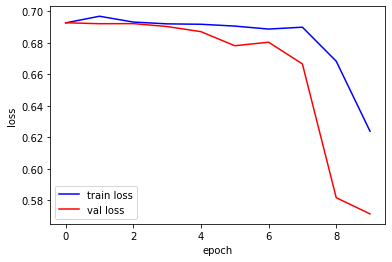

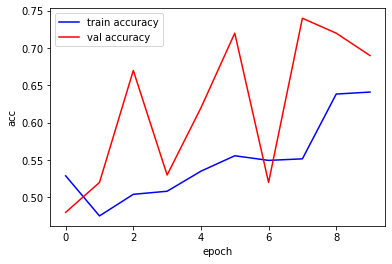


Agora vamos avaliar o modelo no dataset de teste. Vamos para a próximo comando.


In [ ]:
#Definimos o treinamento com o dataset de treino, realizando validação no dataset de validação.
#O treinamento não usa o dataset de teste, ficará guardado para avaliarmos nossa rede depois.

tempo = str(time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
print('')
print('Treino finalizado em %s' % tempo)

#Por fim, plotamos os resultados de evolução da medida de erro (loss) e acurácia ao longo dos epochs
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

print ('\nAgora vamos avaliar o modelo no dataset de teste. Vamos para a próximo comando.')

## Avaliando o modelo

Neste passo, iremos apresentar todo o dataset de teste para o modelo que criamos, de forma a calcular a acurácia da nossa rede neural num grupo de imagens que o modelo nunca viu antes.

In [ ]:
from keras.models import load_model #Vamos importar a função do keras que abre modelos salvos previamente

melhor_modelo = load_model('Melhor_modelo.hdf5') #Abrimos o melhor modelo que salvamos no treinamento

print ('\nPesos da rede neural atualizados para os da melhor época.')
print ('\nEtapa Concluída. Vamos para a próxima!')


Pesos da rede neural atualizados para os da melhor época.

Etapa Concluída. Vamos para a próxima!


In [ ]:
#Usamos a função evaluate para avaliar a acurácia do nosso modelo no grupo de teste
print('Acurácia no grupo de teste: ', melhor_modelo.evaluate(dataset_test, labels_test, verbose=0)[1])

print ('\033[1m' + 'Etapa Concluída.')

Acurácia no grupo de teste:  0.6399999856948853
Etapa Concluída.
